In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.api import families
from statsmodels.formula.api import ols, glm
import matplotlib.pyplot as plt
df = pd.read_parquet("../data/curated/result_df.parquet")
df

,log_earning_efficiency,earning_efficiency,log_trip_distance,trip_distance,PULocationID,time_of_day,day_of_week,duration(min),snow
0,0.171487,1.187069,1.335001,3.80,142,0,6,17.817,no
1,0.397497,1.488095,0.741937,2.10,236,0,6,8.400,no
2,0.084741,1.088435,-0.030459,0.97,166,0,6,8.967,no
3,0.049336,1.050573,0.086178,1.09,114,0,6,10.033,no
4,-0.329384,0.719367,1.458615,4.30,68,0,6,37.533,no
...,...,...,...,...,...,...,...,...,...
8174261,0.159579,1.173017,1.526056,4.60,113,23,4,22.200,no
8174262,0.028508,1.028918,0.641854,1.90,238,23,4,9.233,no
8174263,0.129101,1.137805,1.376244,3.96,148,23,4,16.400,no
8174264,0.244982,1.277598,1.900614,6.69,229,23,4,21.650,no


Assumptions for linear regression

·linear relation ship between x,y : kind of fine

·independence: good except time of day may have some influence on snow

·same variance of residuals for x   : need residual vs fitter

·residuals follow normal distribution : need qq plot

In [9]:
# the large size of df may probably make kernal crush you could
# try add one more zero for sample, after adding, the model
# fitting time should be round to 60s
sample_df = df.sample(100000,random_state= 1234)

In [10]:
mod = ols(formula = 'log_earning_efficiency ~ log_trip_distance + C(PULocationID) + C(time_of_day) + C(day_of_week) + C(snow)'
    , data=sample_df).fit()
print(mod.summary())

                              OLS Regression Results                              
Dep. Variable:     log_earning_efficiency   R-squared:                       0.301
Model:                                OLS   Adj. R-squared:                  0.299
Method:                     Least Squares   F-statistic:                     190.7
Date:                    Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                            21:25:26   Log-Likelihood:                -614.60
No. Observations:                  100000   AIC:                             1681.
Df Residuals:                       99774   BIC:                             3831.
Df Model:                             225                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [11]:
mod2 = ols(formula = 'log_earning_efficiency ~ log_trip_distance + C(time_of_day) + C(day_of_week) + C(snow)'
    , data=sample_df).fit()
print(mod2.summary())

                              OLS Regression Results                              
Dep. Variable:     log_earning_efficiency   R-squared:                       0.182
Model:                                OLS   Adj. R-squared:                  0.182
Method:                     Least Squares   F-statistic:                     718.6
Date:                    Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                            21:25:27   Log-Likelihood:                -8443.9
No. Observations:                  100000   AIC:                         1.695e+04
Df Residuals:                       99968   BIC:                         1.726e+04
Df Model:                              31                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Text(0, 0.5, 'residuals')

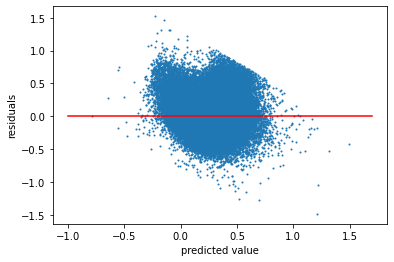

In [12]:
# plot res vs fitted graph for checking variance of residual
pred = mod.fittedvalues
res = sample_df['log_earning_efficiency']-pred
plt.plot([-1,1.7],[0,0],c='red')
plt.scatter(pred,res,s=1) 
plt.xlabel('predicted value')
plt.ylabel('residuals')

<function matplotlib.pyplot.show(close=None, block=None)>

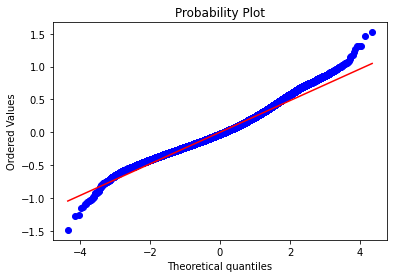

In [13]:
# qq plot to see if the distribution of residuals is normal
import scipy as sp
sp.stats.probplot(res,plot = plt)
plt.show